In [14]:
import pandas as pd
import numpy as np
import json

import os
import sys

from collections import defaultdict
from tqdm import tqdm

from pprint import pprint

import matplotlib.pyplot as plt

In [15]:
os.getcwd()

'/home/ashish/workspace/recommender/notebooks'

In [16]:
sys.path.append('/home/ashish/workspace/recommender/')

In [18]:
data_path = '../data/cleaned/RC_2023-01_2.json' 
with open(data_path, 'rb') as f:
    comments = json.load(f)

In [19]:
usersperitem = defaultdict(set)
itemsperuser = defaultdict(set)
item_name = defaultdict()
for comment in comments:
    user = comment['author']
    item = comment['subreddit_id']
    item_name[item] = comment['subreddit']
    usersperitem[item].add(user)
    itemsperuser[user].add(item)

### Missing values in the data

In [20]:
keys = defaultdict(int)
for comment in tqdm(comments):
    for key in comment:
        keys[key] += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 407380/407380 [00:02<00:00, 201281.97it/s]


In [21]:
pprint(keys)

defaultdict(<class 'int'>,
            {'all_awardings': 407380,
             'archived': 407380,
             'associated_award': 407380,
             'author': 407380,
             'author_cakeday': 971,
             'author_created_utc': 407380,
             'author_flair_background_color': 407380,
             'author_flair_css_class': 407380,
             'author_flair_richtext': 407380,
             'author_flair_template_id': 407380,
             'author_flair_text': 407380,
             'author_flair_text_color': 407380,
             'author_flair_type': 407380,
             'author_fullname': 407380,
             'author_patreon_flair': 407380,
             'author_premium': 407380,
             'body': 407380,
             'can_gild': 407380,
             'collapsed': 407380,
             'collapsed_because_crowd_control': 407380,
             'collapsed_reason': 407380,
             'collapsed_reason_code': 407380,
             'comment_type': 407380,
             'controver

### How many unique users and subreddits are there

In [22]:
n_subreddit = len(set([comment['subreddit_id'] for comment in comments]))
print(f'No. of unique subreddits : {n_subreddit}')

No. of unique subreddits : 6217


In [23]:
n_users = len(set([comment['author'] for comment in comments]))
print(f'No. of unique users : {n_users}')

No. of unique users : 194815


### Most Popular Subreddit (w.r.t number of users who have interacted on it)

In [24]:
most_popular_subreddit = None
max_len = 0
for i, u in usersperitem.items():
    if len(u) > max_len:
        most_popular_subreddit = i
        max_len = len(u)

In [25]:
item_name[most_popular_subreddit]

'AskReddit'

In [26]:
len(usersperitem[most_popular_subreddit])

7275

In [27]:
print(f'Most popular subreddit is {item_name[most_popular_subreddit]} with {len(usersperitem[most_popular_subreddit])} comments')

Most popular subreddit is AskReddit with 7275 comments


In [28]:
topn = 100
for i, k in enumerate(sorted(usersperitem, key=lambda k: len(usersperitem[k]), reverse=True)):
    if i>=topn:
        break
    print(item_name[k], len(usersperitem[k]))

AskReddit 7275
CFB 5504
AmItheAsshole 2327
Damnthatsinteresting 2195
movies 1717
WhitePeopleTwitter 1554
memes 1503
nba 1314
interestingasfuck 1227
pics 1182
facepalm 1004
therewasanattempt 966
NoStupidQuestions 955
gaming 939
mildlyinfuriating 916
teenagers 907
meirl 869
PublicFreakout 846
Eldenring 834
mildlyinteresting 775
worldnews 754
funny 740
shitposting 727
nextfuckinglevel 722
television 692
AskMen 691
antiwork 679
MoscowMurders 668
Unexpected 649
nfl 646
terriblefacebookmemes 636
196 553
TrueOffMyChest 546
Funnymemes 545
PokemonScarletViolet 524
pcmasterrace 508
batman 503
politics 490
MadeMeSmile 450
wholesomememes 445
CasualUK 443
wallstreetbets 440
Tinder 439
pokemon 438
Genshin_Impact 433
unpopularopinion 432
CrazyFuckingVideos 426
ask 418
brasil 407
PokemonGoFriends 407
technology 402
hockey 399
news 390
Wellthatsucks 390
georgiabulldogs 389
Overwatch 388
relationship_advice 385
EscapefromTarkov 383
Philippines 382
HolUp 380
cats 380
todayilearned 380
wow 378
SquaredCirc

### Most Active User (w.r.t number of subreddits it has interacted with)

In [29]:
most_active_user  = None
max_len = 0
for u, i in itemsperuser.items():
    if len(i) > max_len:
        most_active_user = u
        max_len = len(i)

In [30]:
topn = 100
for i, k in enumerate(sorted(itemsperuser, key=lambda k: len(itemsperuser[k]), reverse=True)):
    if i>=topn:
        break
    print(k, len(itemsperuser[k]))

AutoModerator 1625
SaveVideo 67
WikiSummarizerBot 62
MAGIC_EYE_BOT 54
haikusbot 52
sneakpeekbot 43
RepostSleuthBot 40
Flair_Helper 36
QualityVote 33
savevideobot 32
of_patrol_bot 30
International_Way731 26
FloodgatesBot 26
exclaim_bot 26
RemindMeBot 24
BubbllyBoy 24
Dear_Piglet1391 23
toiletmouth4u 22
bear0001huggy 22
B0tRank 21
alphabet_order_bot 21
rocky9724 21
Animehawk44 21
MaskeRRR 20
FictionalFail 19
Prestigious-Film4128 19
tadlrs 19
OneLostOstrich 19
Firstandthirst 18
lordo_fwar 18
InkedLara69 18
XNeon_Dark_BeastX 17
throwaway808312 17
KeyCommission8508 16
LemonsAndAvocados 15
Radical-SpaceMeat 15
auddbot 15
fuzzybunny561 15
AgnosticGayMormon 14
Gloomy_Ad8816 14
ResidentEivvil 14
MeltAway421 14
BigDaddyJ34 14
Sus-Rocket 14
Old-Question-2950 14
Threaxawiegh 13
RubyRoxxxy 13
lover4evr99 13
vrushab1904 13
WhatALotOAxolotls 13
VelonLikesMelons 13
thesamiad 13
Wanga69 13
LoveNeon19 13
RioRem 13
balrus-balrogwalrus 13
Call_of_Tculhu 13
ObserverCurious 13
BigBossBurnerAccount 13
MaryGr

### Distribution of comments in subreddits

In [31]:
comments_per_subreddit = defaultdict(int)
for comment in comments:
    subreddit_id = comment['subreddit_id']
    comments_per_subreddit[subreddit_id] +=1

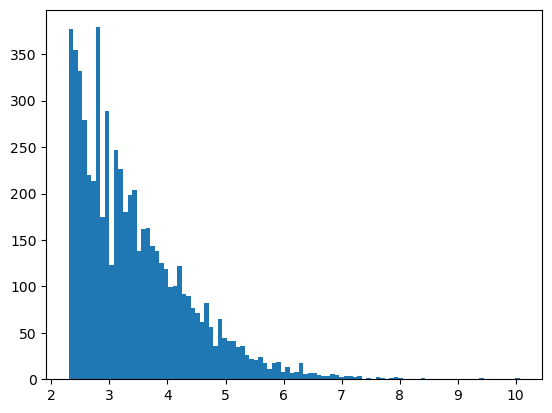

In [48]:
plt.hist(np.log(list(comments_per_subreddit.values())), bins = 100)
plt.show()

In [38]:
def count_subreddit(thresh = 1):
    num = 0
    for i, u in usersperitem.items():
        if len(u) < thresh:
            num+=1
    return num

In [46]:
thresh = 10
num = count_subreddit(thresh)
print(f'No. of subreddits with less than {thresh} commentors : {num} ({num/len(usersperitem)*100:.2f}%)')

No. of subreddits with less than 10 commentors : 1276 (20.52%)


In [47]:
thresh = 20
num = count_subreddit(thresh)
print(f'No. of subreddits with less than {thresh} commentors : {num} ({num/len(usersperitem)*100:.2f}%)')

No. of subreddits with less than 20 commentors : 3487 (56.09%)
